In [1]:
from keras.models import Sequential 
from keras.layers import Dense,Conv2D,MaxPooling2D,UpSampling2D
from keras import Input, Model
from keras.datasets import mnist

from extra_keras_datasets import emnist
from extra_keras_datasets import kmnist

import numpy as np
import matplotlib.pyplot as plt

from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

In [2]:
encoding_dim = 15

input_img = Input(shape=(784,))
encoded_1 = Dense(100, activation='relu')(input_img)
encoded_2 = Dense(30, activation='relu')(input_img)
encoded = Dense(encoding_dim, activation='relu')(encoded_2)
decoded_2 = Dense(30, activation='relu')(encoded) 
decoded_1 = Dense(100, activation='relu')(decoded_2) 
decoded = Dense(784, activation='sigmoid')(decoded_1)

autoencoder = Model(inputs=input_img, outputs=decoded)

autoencoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense_1 (Dense)             (None, 30)                23550     
                                                                 
 dense_2 (Dense)             (None, 15)                465       
                                                                 
 dense_3 (Dense)             (None, 30)                480       
                                                                 
 dense_4 (Dense)             (None, 100)               3100      
                                                                 
 dense_5 (Dense)             (None, 784)               79184     
                                                                 
Total params: 106,779
Trainable params: 106,779
Non-trainable

In [3]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [4]:
(x_train, y_train), (x_test, y_test) =  kmnist.load_data(type='kmnist')

INFO:root:Loading dataset = kmnist


In [5]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


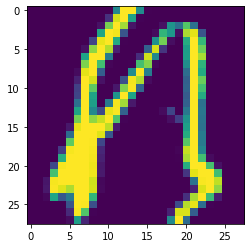

In [6]:
plt.imshow(x_train[0].reshape(28,28))

In [7]:
history = autoencoder.fit(x_train, x_train, epochs=30, batch_size=256, validation_data=(x_test, x_test))

Epoch 1/30
235/235 [==============================] - 4s 13ms/step - loss: 0.4127 - val_loss: 0.3499
Epoch 2/30
235/235 [==============================] - 3s 11ms/step - loss: 0.3242 - val_loss: 0.3186
Epoch 3/30
235/235 [==============================] - 2s 9ms/step - loss: 0.3015 - val_loss: 0.3064
Epoch 4/30
235/235 [==============================] - 2s 10ms/step - loss: 0.2885 - val_loss: 0.2955
Epoch 5/30
235/235 [==============================] - 2s 10ms/step - loss: 0.2793 - val_loss: 0.2897
Epoch 6/30
235/235 [==============================] - 2s 10ms/step - loss: 0.2744 - val_loss: 0.2864
Epoch 7/30
235/235 [==============================] - 2s 10ms/step - loss: 0.2712 - val_loss: 0.2840
Epoch 8/30
235/235 [==============================] - 2s 10ms/step - loss: 0.2687 - val_loss: 0.2820
Epoch 9/30
235/235 [==============================] - 2s 10ms/step - loss: 0.2663 - val_loss: 0.2792
Epoch 10/30
235/235 [==============================] - 2s 10ms/step - loss: 0.2638 - val_los

In [8]:
decoded_img = autoencoder.predict(x_test)

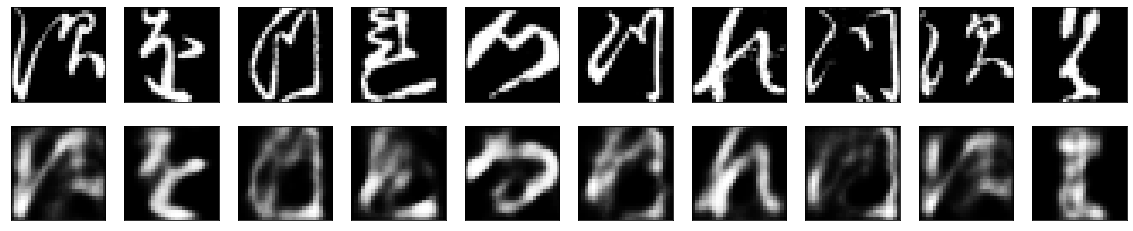

In [9]:
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_img[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

dict_keys(['loss', 'val_loss'])


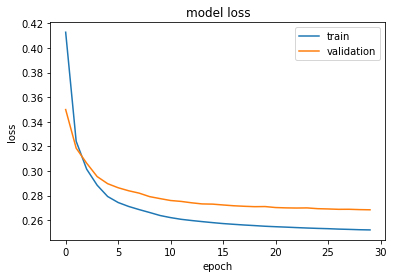

In [10]:
print(history.history.keys())

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()